<a href="https://colab.research.google.com/github/sketchydough/Pytorch-DL-Practice/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#convert mnist image files into a tensor of 4-D (#images,height,width,color channel)
transform=transforms.ToTensor()  #changing images to a tensor


In [7]:
#train data
train_data=datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 131MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 19.5MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 105MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.55MB/s]


In [8]:
#test data
test_data=datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)

In [9]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
#create a small batch size for images..let 10
train_loader= DataLoader(train_data,batch_size=10,shuffle=True)
test_loader= DataLoader(test_data,batch_size=10,shuffle=False)

In [12]:
#define our cnn model
#describe convolutional layer and what its doing (2 convolutional layers)

conv1=nn.Conv2d(1,6,3,1) #input images,#convolutional layers, #kernal 3x3 size, stride one ata time
conv2=nn.Conv2d(6,16,3,1) #here 6 inputd cuz from prev conv we get 6 o/p, 16 convolutional layers, 3x3 kernal, 1 o/p

In [13]:
#grab 1 mnist record/image
for i, (X_train, y_train) in enumerate(train_data):
  break

In [14]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [15]:
X_train.shape

torch.Size([1, 28, 28])

In [16]:
#changing it to 4d
x=X_train.view(1,1,28,28)

In [17]:
#perform our first convolution
x=F.relu(conv1(x)) #rectified linear unit for our activation function

In [18]:
x.shape #1 single image, 6 filters we asked for, 26x26 ? cuz it shrinks since we didnt set the padding when we defined our model

torch.Size([1, 6, 26, 26])

In [19]:
#pass thru the pooling layer
x=F.max_pool2d(x,2,2) #kernal of 2 and stride of 2

In [20]:
x.shape #13 cuz we set the kernal and stride of 2 for pooling  26/2=13


torch.Size([1, 6, 13, 13])

In [21]:
# lets do our second convolutional layer
x=F.relu(conv2(x))

In [22]:
x.shape # 13x13 and since we didnt set any padding ->so we loose 2 pxels around the outside of the image

torch.Size([1, 16, 11, 11])

In [23]:
#pooling layer
x=F.max_pool2d(x,2,2)

In [24]:
x.shape #11/2=5.5 but we have to round down, bco you cant invent data to round up

torch.Size([1, 16, 5, 5])

In [25]:
#model class

class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1= nn.Conv2d(1,6,3,1)
    self.conv2= nn.Conv2d(6,16,3,1)
    #fully connected layer
    self.fc1=nn.Linear(5*5*16,120) #flattening out to 120 neurons
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

    #need a forward function to define the layout
  def forward(self,X):
    X=F.relu(self.conv1(X))
    X=F.max_pool2d(X,2,2) #2x2 kernal and stride 2
    #second pass
    X=F.relu(self.conv2(X))
    X=F.max_pool2d(X,2,2)

      #re-view to flatten it out
    X=X.view(-1, 16*5*5) #negative one so that we can vary the batch size

      #fully connected layers
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)
    return F.log_softmax(X, dim=1)

In [26]:
#create an instance of our model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
#loss function optimizer
criterion= nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01) #smaller the learnign rate, longer its gonna take to train

In [28]:
import time # to see how long this takes
start_time= time.time()

#create variables to track things
epochs=5
train_losses=[]
test_losses=[]
test_correct=[]
train_correct=[]

#For loop of epochs
for i in range(epochs):
  train_corr=0
  test_corr=0

  #Train
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1 #start batches at 1
    y_pred =model(X_train) #get predicted value from the trianing set. not flattened, its 2d
    loss= criterion(y_pred,y_train) #calulate loss

    predicted=torch.max(y_pred.data, 1)[1] #add up the number of correct predictions. indexed off the first point
    batch_corr=(predicted == y_train).sum() #how many we got correct from this batch. true=1,false=0 and sum it up
    train_corr += batch_corr #add up the number of correct predictions

    #update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print results
    if b%600==0:
      print(f'epoch: {i} batch: {b} loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(train_corr)

  #Test
  with torch.no_grad(): #no grad so we dont update our weights and biases with test data
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1] #adding up correct predictions
      test_corr += (predicted == y_test).sum() # T=1 F=0 and sum it away

  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(test_corr)



current_time=time.time()
total=current_time-start_time
print(f'Training took: {total/60} minutes')

epoch: 0 batch: 600 loss: 0.01122160442173481
epoch: 0 batch: 1200 loss: 0.5097795128822327
epoch: 0 batch: 1800 loss: 0.27345114946365356
epoch: 0 batch: 2400 loss: 0.5706523656845093
epoch: 0 batch: 3000 loss: 0.010505528189241886
epoch: 0 batch: 3600 loss: 0.1338011920452118
epoch: 0 batch: 4200 loss: 0.0005176571430638433
epoch: 0 batch: 4800 loss: 0.10394303500652313
epoch: 0 batch: 5400 loss: 0.2622598111629486
epoch: 0 batch: 6000 loss: 0.0009407080942764878
epoch: 1 batch: 600 loss: 0.010575367137789726
epoch: 1 batch: 1200 loss: 0.004694225732237101
epoch: 1 batch: 1800 loss: 0.06041830778121948
epoch: 1 batch: 2400 loss: 0.08412185311317444
epoch: 1 batch: 3000 loss: 1.2497214078903198
epoch: 1 batch: 3600 loss: 0.5397676229476929
epoch: 1 batch: 4200 loss: 0.005220157094299793
epoch: 1 batch: 4800 loss: 0.0007686594035476446
epoch: 1 batch: 5400 loss: 0.0005603323224931955
epoch: 1 batch: 6000 loss: 0.08629796653985977
epoch: 2 batch: 600 loss: 0.6476114988327026
epoch: 2 ba

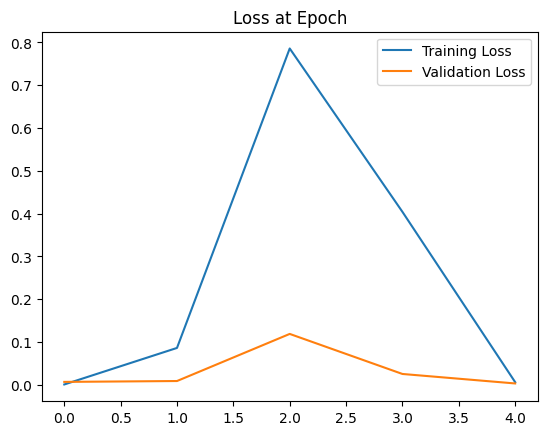

In [29]:
#graph the loss at epoch
import matplotlib.pyplot as plt

train_losses=[tl.item() for tl in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss at Epoch')
plt.legend()

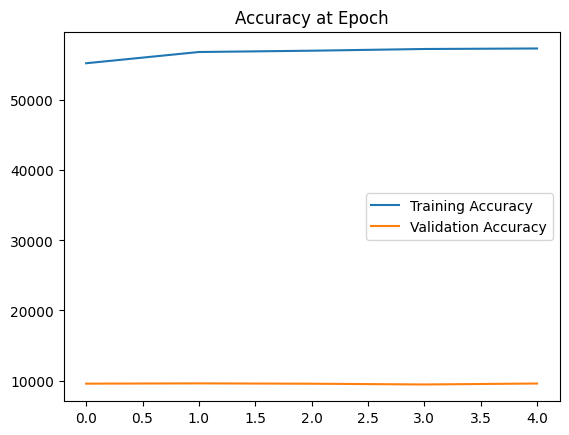

In [31]:
#graph accuracy at the end of each epoch
plt.plot([t.item() for t in train_correct], label='Training Accuracy')
plt.plot([t.item() for t in test_correct], label='Validation Accuracy')
plt.title('Accuracy at Epoch')
plt.legend()

In [32]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [36]:
with torch.no_grad():
  correct =0
  for X_test, y_test in test_load_everything:
    y_val=model(X_test)
    predicted=torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

print(f'Test accuracy: {correct.item()/10000}')

Test accuracy: 0.9572


In [37]:
#testing on new image
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [38]:
#grabing just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [39]:
#reshaping it
test_data[4143][0].reshape(1,1,28,28)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

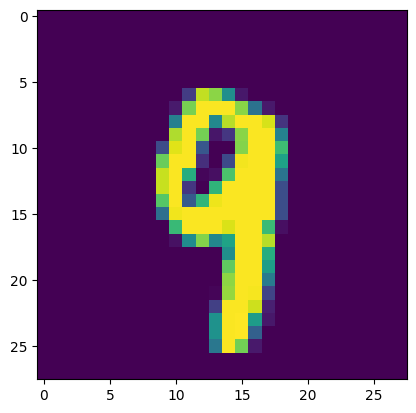

In [40]:
#showing the image first
plt.imshow(test_data[4143][0].reshape(28,28))

In [42]:
#pass the image thru the model
model.eval()
with torch.no_grad():
  new_prediction =model(test_data[4143][0].view(1,1,28,28))

In [43]:
new_prediction

tensor([[-14.1406, -10.4021, -11.7207,  -9.3655,  -3.4136, -11.3221, -23.4596,
          -6.9363,  -6.9563,  -0.0356]])

In [44]:
new_prediction.argmax()

tensor(9)